In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

2025-01-22 19:53:44.856486: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


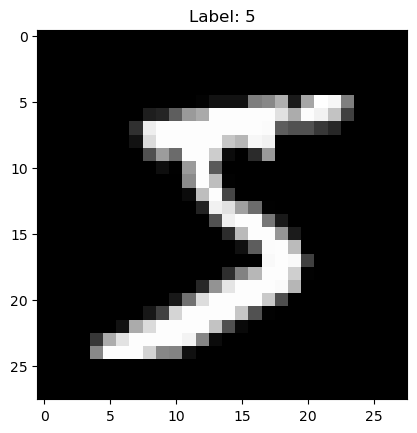

In [8]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

plt.imshow(X_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()

In [9]:
model = Sequential ([
    Flatten(input_shape=(28,28)), # преобразовние 2D-изображений в 1мерный вектор
    Dense(128, activation='relu'), # скрытый слой с 128 нейронами
    Dense(10, activation='softmax') # выходной слой для 10 классов (0-9)
])

In [10]:
model.compile(
    optimizer='adam', # Адаптивный оптимизатор
    loss='sparse_categorical_crossentropy', # Функция потерь для многоклассовой классификации
    metrics=['accuracy'] # Метрика точности
)

In [11]:
history = model.fit(X_train,y_train, epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8758 - loss: 0.4603 - val_accuracy: 0.9555 - val_loss: 0.1596
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9603 - loss: 0.1363 - val_accuracy: 0.9648 - val_loss: 0.1165
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9728 - loss: 0.0902 - val_accuracy: 0.9698 - val_loss: 0.1033
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9805 - loss: 0.0664 - val_accuracy: 0.9730 - val_loss: 0.0924
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9850 - loss: 0.0497 - val_accuracy: 0.9710 - val_loss: 0.0963
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9887 - loss: 0.0384 - val_accuracy: 0.9712 - val_loss: 0.0991
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9916 - loss: 0.0301 - val_accuracy: 0.9737 - val_loss: 0.0908
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9941 - loss: 0.0228 - 

In [12]:
test_loss, test_acc = model.evaluate(X_test,y_test,verbose=2)
print(f'Test Accuracy: {test_acc}')

313/313 - 0s - 909us/step - accuracy: 0.9731 - loss: 0.0947
Test Accuracy: 0.9731000065803528


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Label: 7


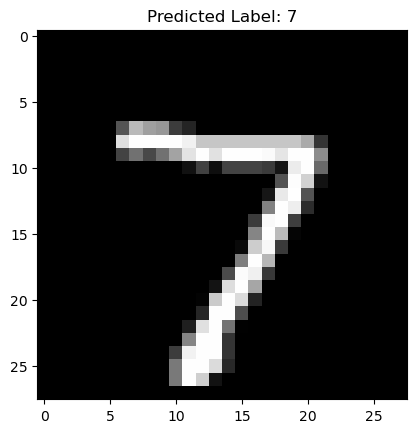

In [13]:
sample_image = X_test[0].reshape(1,28,28) # подаем изображение в виде батча
predictions = model.predict(sample_image)

predicted_label = np.argmax(predictions)
print(f'Predicted Label: {predicted_label}')

plt.imshow(X_test[0],cmap='gray')
plt.title(f'Predicted Label: {predicted_label}')
plt.show()

Text(0, 0.5, 'accuracy')

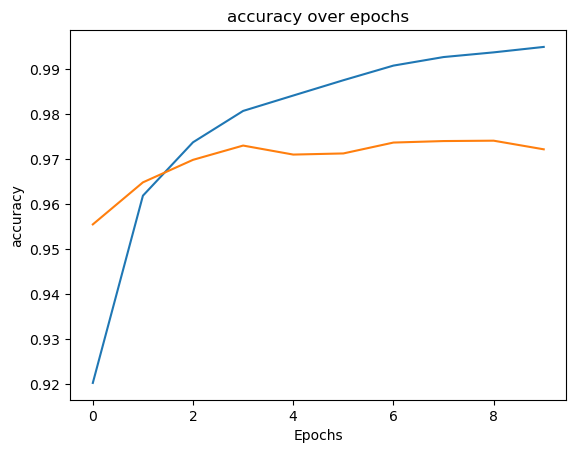

In [16]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

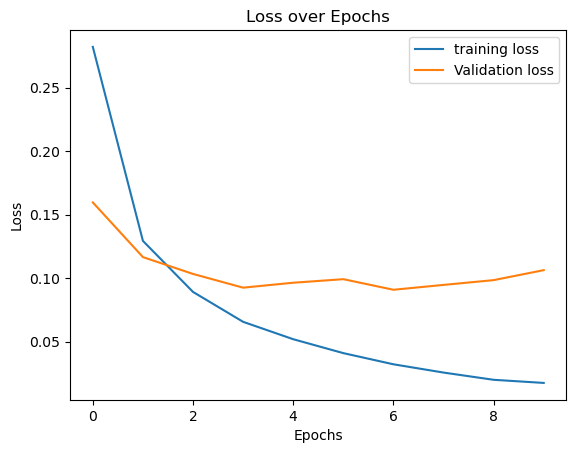

In [17]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()